### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# 6c. Random Forest Regressor
## Red Wine, Outliers Not Removed

#### Audrey Hughes Rager
#### December 30, 2020


In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

sns.set_style('whitegrid')

## Data Wrangling

### Import Data

In [2]:
#Import csv files into Pandas data frames
df = pd.read_csv('winequality-red.csv',sep=";")
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)



### EDA


In [3]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


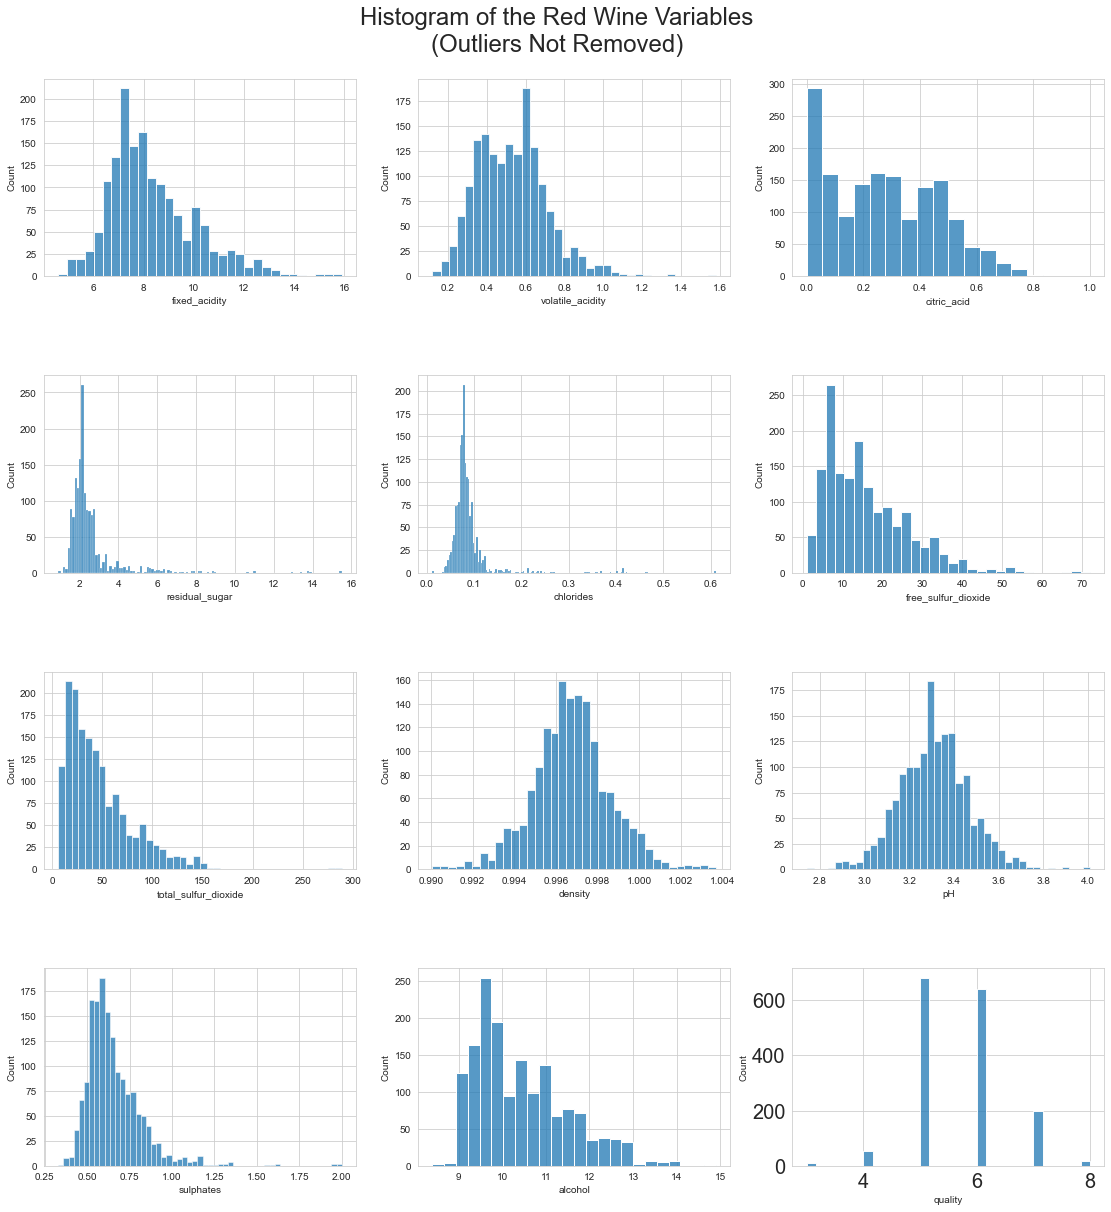

In [4]:
#Historgrams  - outliers removed (df)
def subplot_histplot(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.histplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['quality','fixed_acidity','volatile_acidity', 'citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density', 'pH', 'sulphates','alcohol']
    


myhistplot = subplot_histplot(df[plot_columns], row = 4, column = 3, title = "Histogram of the Red Wine Variables\n(Outliers Not Removed)")


### Train-Test-Split

In [5]:
#Independent variables (X) = everything but the target variable, y
#Target variable, y, is quality

#Set X to all the input variables (everything except 'quality')
X = df.drop('quality',axis=1)

#Set the variable to be predicted (y) to 'quality'
y = df['quality']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


### Scale Independent Variables

In [7]:
# applying Standard Scaling to the dataset to scale all the field values to same scale (approx.).

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

# Instantiate the Random Forest Regressor Model

In [8]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth=20, min_samples_leaf=50, random_state = 42)

# Fit the Model to the Training Data

In [9]:
rfrModel = rfr.fit(X_train,y_train)

# Predict Using Test Data

In [10]:
y_pred = rfrModel.predict(X_test)

In [11]:
print(y_pred)

[5.30022158 5.10324064 5.55466368 5.15555002 5.72522903 5.0613417
 5.25319531 4.95633659 5.7583612  5.8872304  6.37489223 5.56459469
 5.53676195 5.31167948 5.47603122 5.97429952 5.21137413 5.61185197
 6.58395972 5.25740684 5.24801114 5.35411744 5.7794257  6.08848919
 5.40087564 5.59329152 6.43790246 5.29720281 5.23209739 5.99092964
 5.25325474 5.26056763 5.76681174 5.10112861 5.52796769 5.10501985
 6.15526607 5.90700448 5.50667787 5.68940309 5.20436353 5.12415051
 6.06521435 5.24154649 5.72607434 5.69716856 6.2437659  5.50331587
 5.26630108 5.56826035 5.20315145 5.30181307 5.58775587 6.56477302
 5.24048671 5.20796517 5.95770247 5.60608135 5.53549783 5.43541719
 5.53968851 6.09738509 5.2407648  5.2223747  6.63430865 5.15301384
 6.40938231 5.46639381 6.62608293 5.26705913 5.94618861 5.24638402
 5.76491404 5.52890264 6.33163313 5.11496566 6.57310717 5.9979569
 6.32309588 6.62562662 5.51777958 6.64439549 5.309682   5.37385723
 5.78558224 6.59549021 5.15262018 5.95435215 6.25636776 5.449678

In [12]:
print(rfr.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[5.69125763]


In [13]:
print(rfrModel.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[5.69125763]


# Evaluate Model

In [14]:
mae_r = mean_absolute_error(y_test,y_pred)
mse_r = mean_squared_error(y_test,y_pred)

In [15]:
print("Mean Absolute Error (MAE):",round(mae_r,4))
print("Mean Squared Error (MSE):",round(mse_r,4))


Mean Absolute Error (MAE): 0.5003
Mean Squared Error (MSE): 0.4047


In [16]:
importance = rfrModel.feature_importances_
importance

array([0.00471206, 0.09443179, 0.00665069, 0.00240705, 0.00757691,
       0.00383425, 0.03832787, 0.01138715, 0.01079816, 0.2582456 ,
       0.56162847])

In [17]:
columns = X.columns

In [18]:
rfrGraph = pd.Series(importance,columns)
rfrGraph

fixed_acidity           0.004712
volatile_acidity        0.094432
citric_acid             0.006651
residual_sugar          0.002407
chlorides               0.007577
free_sulfur_dioxide     0.003834
total_sulfur_dioxide    0.038328
density                 0.011387
pH                      0.010798
sulphates               0.258246
alcohol                 0.561628
dtype: float64

[Text(0.5, 1.0, 'Red Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)')]

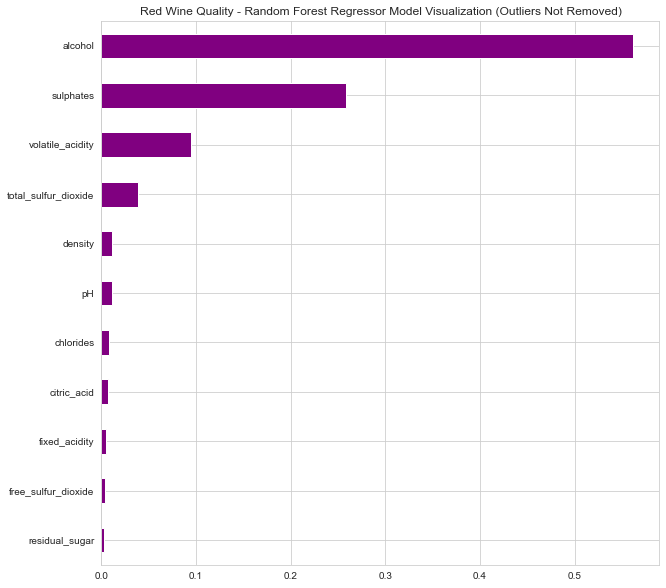

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

rfrGraph.sort_values().plot.barh(color="purple")

[plt.title("Red Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)")]